In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_leads = pd.read_csv("Leads.csv")
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
df_leads.shape

(9240, 37)

In [6]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
## There are some null values and this data needs to be treated
## Lets see the percentage of Null values in the data

In [7]:
round(100*(df_leads.isnull().sum()/len(df_leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

## Data Cleaning and Treatment

In [10]:
#dropping Lead Number and Prospect ID since they have all unique values

df_leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

C:\Users\VAMSIDHAR\AppData\Local\Temp\ipykernel_12628\1524827987.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)


In [12]:
#dropping cols with more than 20% missing values

df_leads = df_leads.drop(['Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index','Lead Profile','Lead Quality','City','Tags','What matters most to you in choosing a course','What is your current occupation','How did you hear about X Education','Specialization','Country'],axis =1)
#dropping cols with more than 20% missing values
​
df_leads = df_leads.drop(['Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index','Lead Profile','Lead Quality','City','Tags','What matters most to you in choosing a course','What is your current occupation','How did you hear about X Education','Specialization','Country'],axis =1)
df_leads.shape

In [14]:
df_leads.shape

(9240, 22)

In [15]:
#checking null values percentage

round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)

Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply Chain Content           0.00
Get updates on DM Content                   0.00
I agree to pay the amount through cheque    0.00
A free copy of Maste

In [16]:

# 'Last Activity' have 1.11 % 'NaN' values
# Imputing values for 'Last Activity'
# Replacing 'NaN' with 'Email Opened'
df_leads[['Last Activity']]=df_leads[['Last Activity']].fillna(value='Email Opened')

# 'Lead Source' have 0.39 % 'NaN' values
# Imputing values for 'Lead Source'
# Replacing 'NaN' with 'No Source'
df_leads[['Lead Source']]=df_leads[['Lead Source']].fillna(value='No Source')

# Imputing 'Page Views Per Visit','TotalVisits' with Mean, since the amount of missing data is less (< 2%) and variation in data is low.
df_leads[['Page Views Per Visit']]=df_leads[['Page Views Per Visit']].fillna(value=df_leads[['Page Views Per Visit']].mean())
df_leads[['TotalVisits']]=df_leads[['TotalVisits']].fillna(value=df_leads[['TotalVisits']].mean())

In [17]:
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content                   0.0
I agree to pay the amount through cheque    0.0
A free copy of Mastering The Interview  

## Categorical Analysis

In [19]:
def num_col_univariate_analysis(c):
  plt.figure(figsize=(4, 4))
  ax = sns.boxplot(y=c, data=df_leads)
  plt.show()

In [20]:
def cat_col_univariate_analysis(c):
  sns.catplot(y=c, data=df_leads, kind="count")
  plt.show()

In [21]:
def num_col_bivariate_analysis(c1,c2):
  plt.figure(figsize=(4, 4))
  ax = sns.boxplot(x=c1, y=c2, data=df_leads)
  plt.show()

In [22]:
def cat_col_bivariate_analysis(c1,c2):
  sns.catplot(col=c1 ,y=c2, data=df_leads, kind="count")
  plt.show()

In [23]:
numerical_column = {'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'}

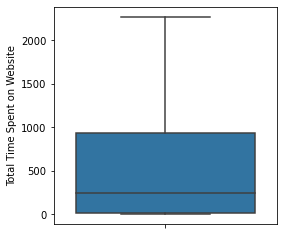

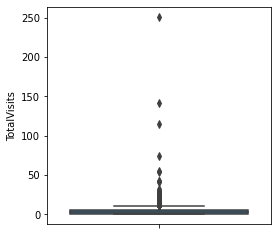

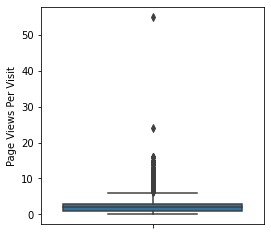

In [24]:
# Univariate Analysis of Numerical Columns
for c in numerical_column:
  num_col_univariate_analysis(c)

In [26]:
categorical_column = {'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
                      'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
                      'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'}

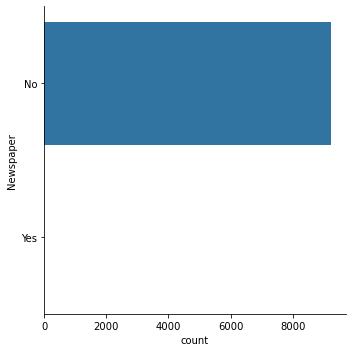

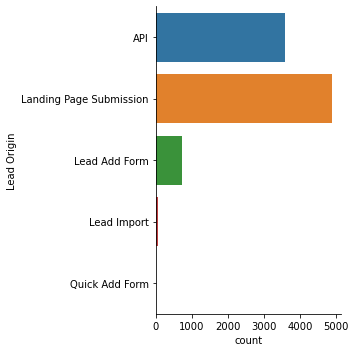

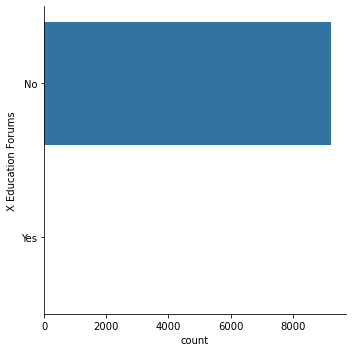

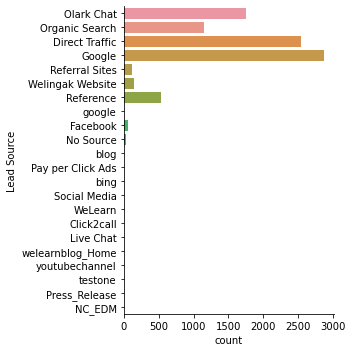

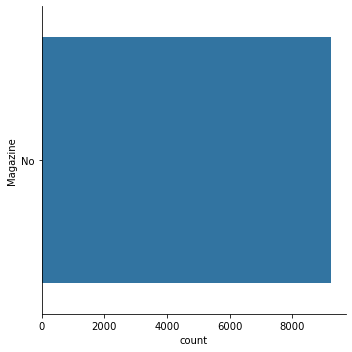

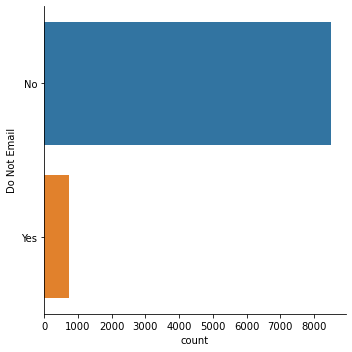

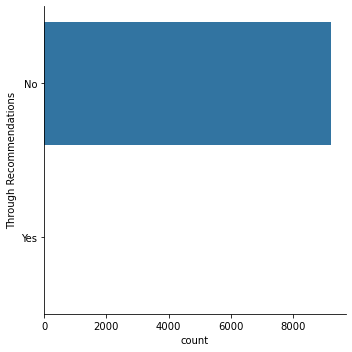

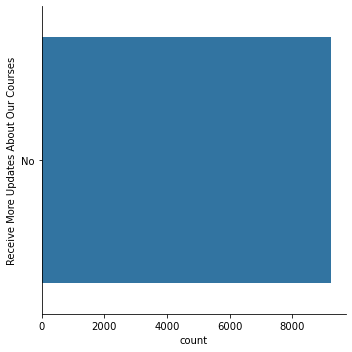

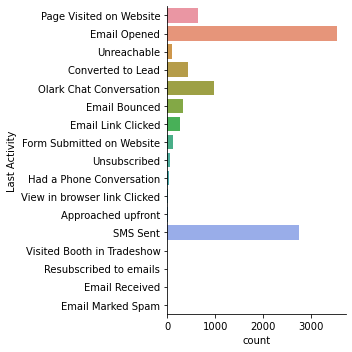

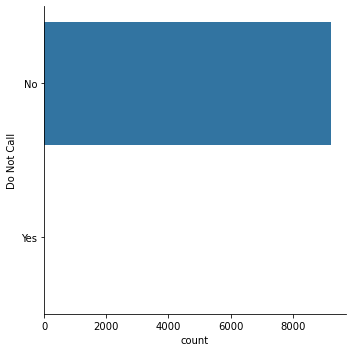

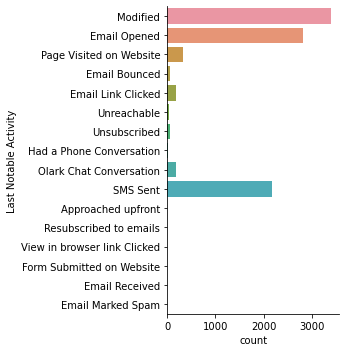

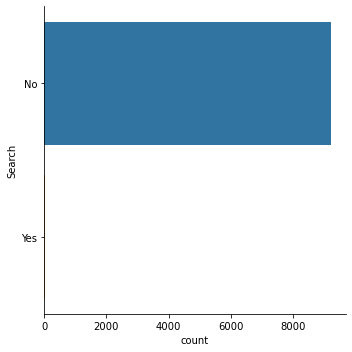

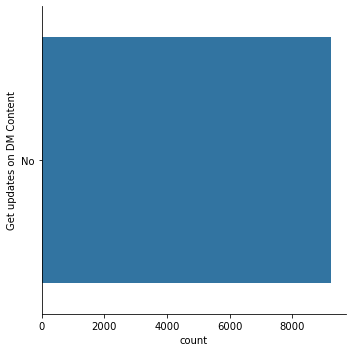

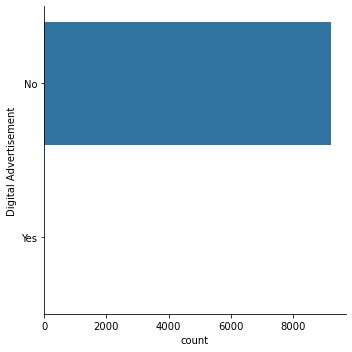

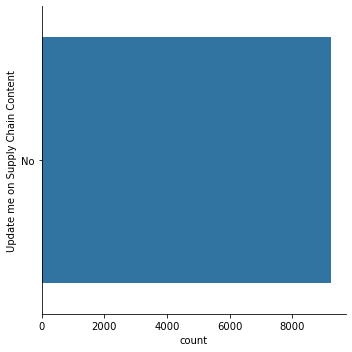

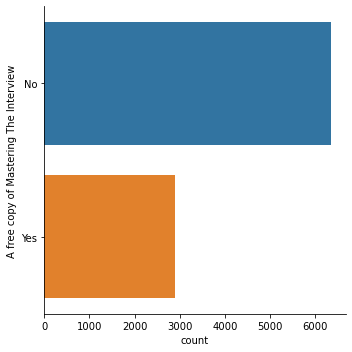

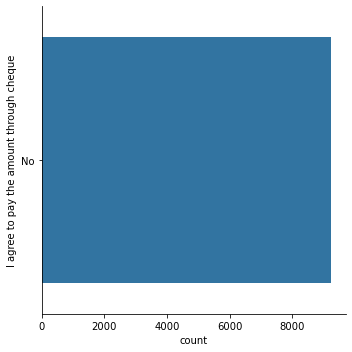

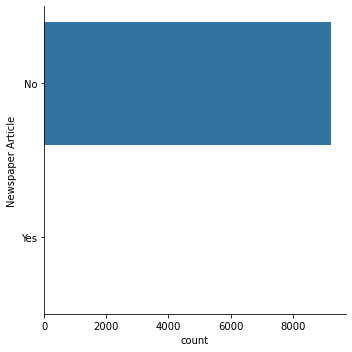

In [27]:
# Univariate Analysis of Categorical Columns
for c in categorical_column:
  cat_col_univariate_analysis(c)

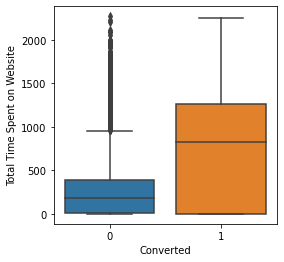

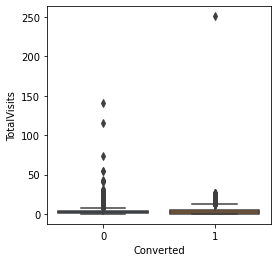

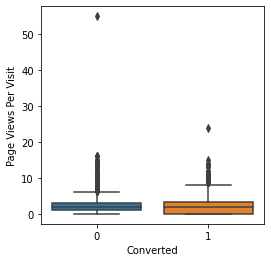

In [28]:
# Bivariate Analysis of Numerical Columns
for c in numerical_column:
  num_col_bivariate_analysis('Converted',c)

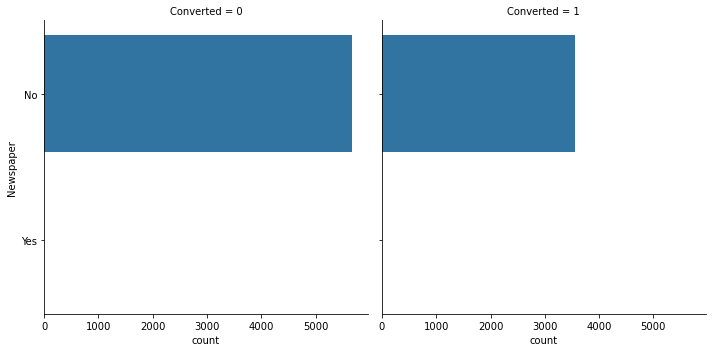

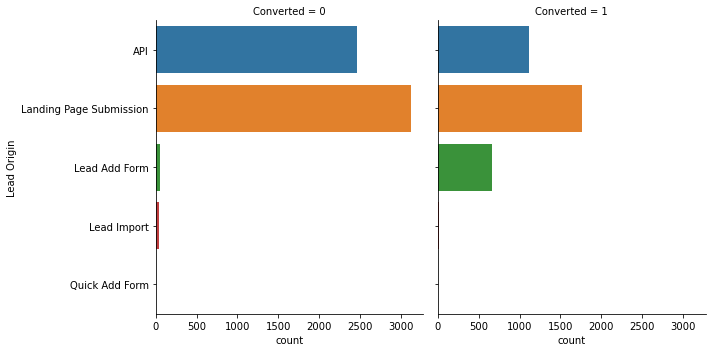

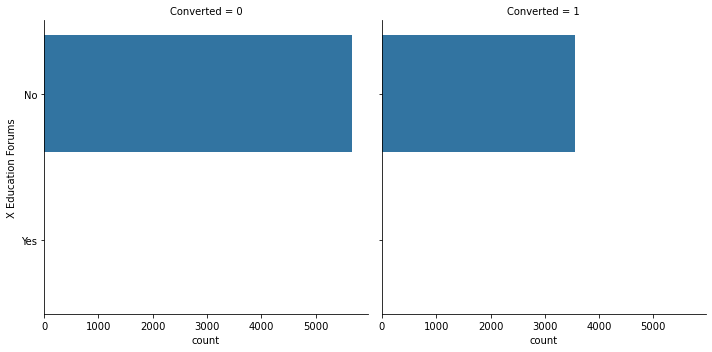

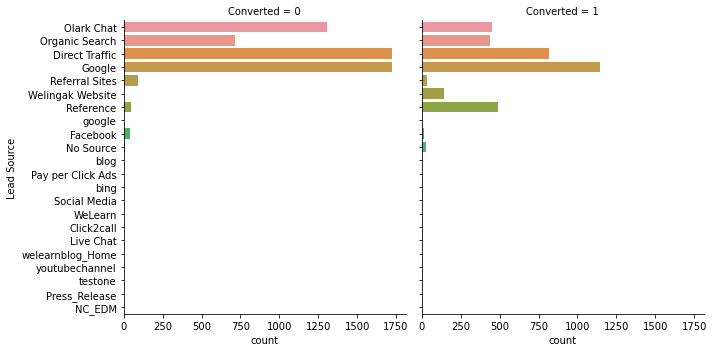

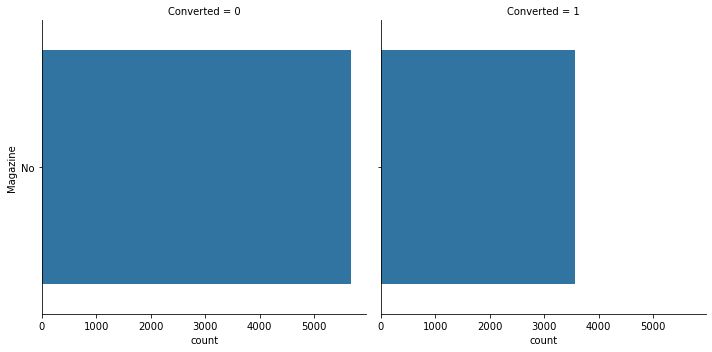

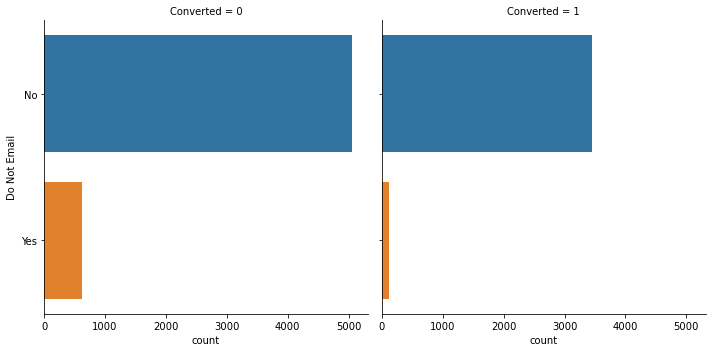

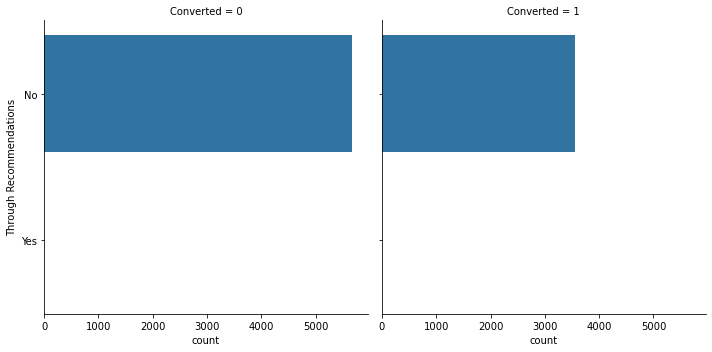

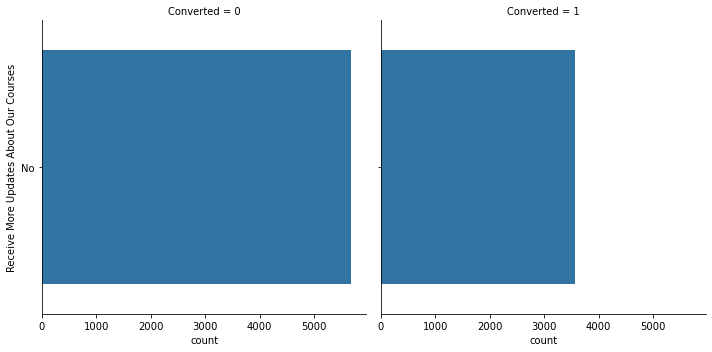

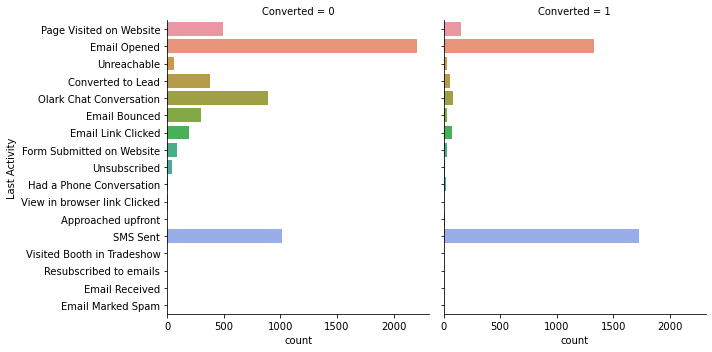

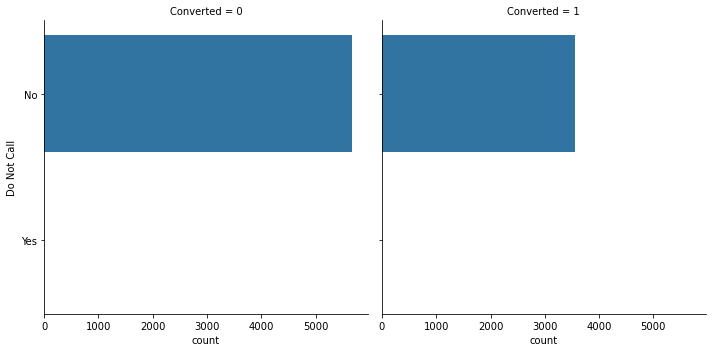

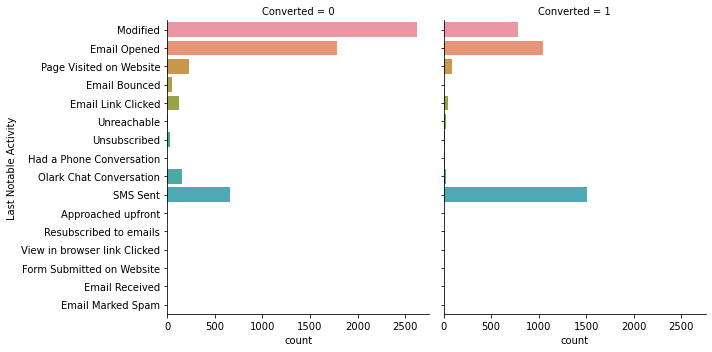

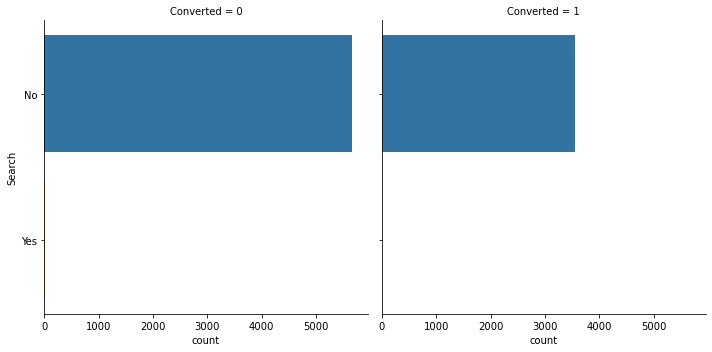

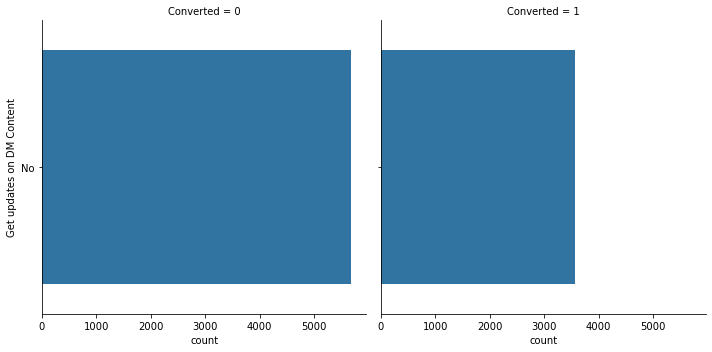

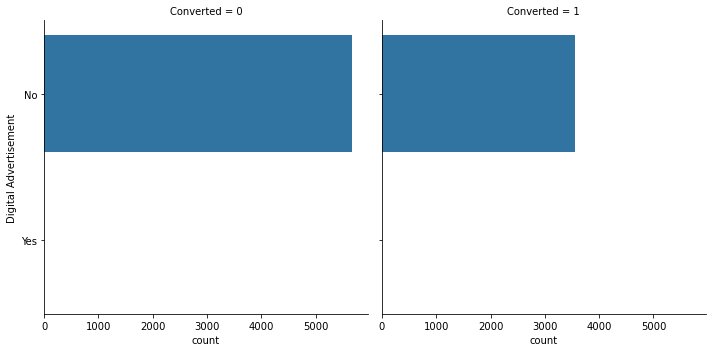

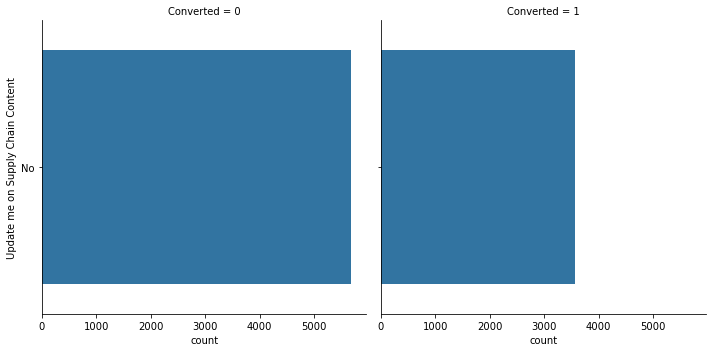

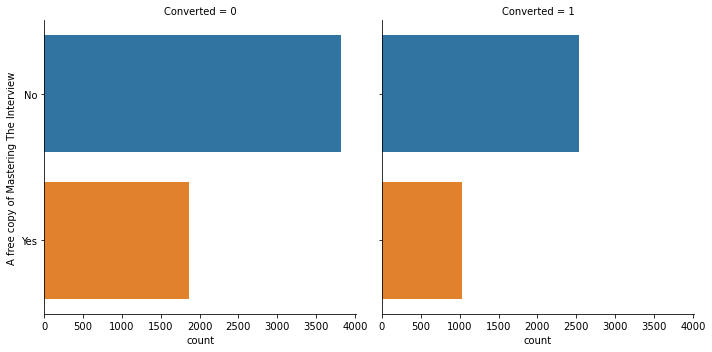

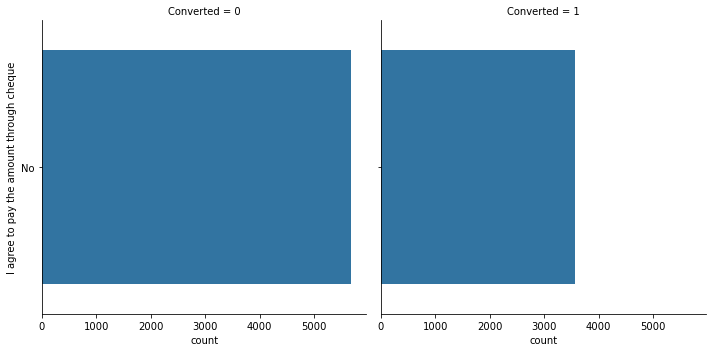

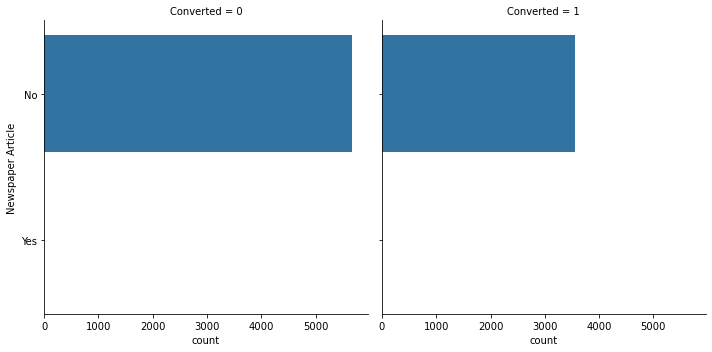

In [29]:
# Bivariate Analysis of Categorical Columns
for c in categorical_column:
  cat_col_bivariate_analysis('Converted',c)

In [ ]:
## Correlation

<AxesSubplot:>

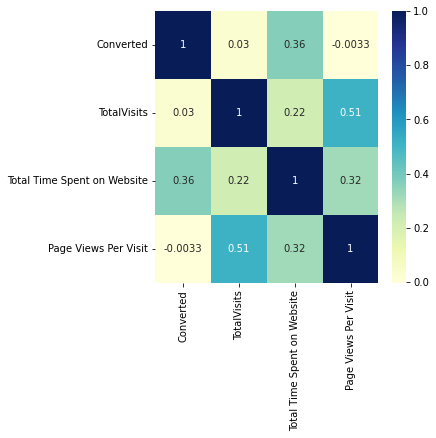

In [31]:
plt.figure(figsize=(5, 5))
sns.heatmap(df_leads.corr(), cmap="YlGnBu",annot=True)

In [ ]:
# Summary: Upon observing numerous plots above in EDA (I), we conclude the following points:

# Univariate Analysis Conclusion:

#There is low variation in Page Views Per Visit and TotalVisits but higher variation in Total Time Spent on Website
#There are a lot of outliers in Page Views Per Visit and TotalVisits which needs to be treated before modelling

#Bivariate Analysis Conclusion:

#There is positive correlation between Total Time Spent on Website and Conversion
#There is come correlation between Conversion and some categorical columns like Lead Origin and Lead Source
#Correlation Analysis (Heatmap) Conclusion:

#There is positive correlation between Total Time Spent on Website and Conversion
#There is almost no correlation in Page Views Per Visit and TotalVisits with Conversion

In [35]:
# Removing categorical columns that have less or no impact. These columns have same value.
df_leads = df_leads.drop(['Get updates on DM Content','Newspaper Article','Magazine','I agree to pay the amount through cheque','Receive More Updates About Our Courses','Update me on Supply Chain Content','Newspaper','Through Recommendations','Search','Do Not Call','Digital Advertisement','X Education Forums'],axis=1)

## Dummy Variables

In [37]:
categorical_column = {'Lead Origin', 'Lead Source', 'Do Not Email','Last Activity', 'A free copy of Mastering The Interview', 'Last Notable Activity'}

In [38]:
df_leads[list(categorical_column)].describe()

,Last Notable Activity,A free copy of Mastering The Interview,Lead Source,Lead Origin,Do Not Email,Last Activity
count,9240,9240,9240,9240,9240,9240
unique,16,2,22,5,2,17
top,Modified,No,Google,Landing Page Submission,No,Email Opened
freq,3407,6352,2868,4886,8506,3540


In [40]:
df_leads = pd.get_dummies(data=df_leads, columns=list(categorical_column), drop_first=True)
del categorical_column

In [41]:
df_leads.shape

(9240, 62)

In [42]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 62 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Converted                                           9240 non-null   int64  
 1   TotalVisits                                         9240 non-null   float64
 2   Total Time Spent on Website                         9240 non-null   int64  
 3   Page Views Per Visit                                9240 non-null   float64
 4   Last Notable Activity_Email Bounced                 9240 non-null   uint8  
 5   Last Notable Activity_Email Link Clicked            9240 non-null   uint8  
 6   Last Notable Activity_Email Marked Spam             9240 non-null   uint8  
 7   Last Notable Activity_Email Opened                  9240 non-null   uint8  
 8   Last Notable Activity_Email Received                9240 non-null   uint8  
 9

In [43]:
df_leads.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,...,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.445238,487.698268,2.362820,0.006494,0.018723,0.000216,0.305952,0.000108,0.000108,...,0.012554,0.003247,0.105303,0.069264,0.000108,0.297078,0.010065,0.006602,0.000649,0.000108
std,0.486714,4.818723,548.021466,2.145333,0.080325,0.135552,0.014711,0.460835,0.010403,0.010403,...,0.111346,0.056891,0.306960,0.253916,0.010403,0.456996,0.099823,0.080987,0.025475,0.010403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,5.000000,936.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,251.000000,2272.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Outlier Treatment

In [48]:
numerical_column = df_leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numerical_column.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.445238,487.698268,2.362820
std,4.818723,548.021466,2.145333
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
99%,17.000000,1840.610000,9.000000
max,251.000000,2272.000000,55.000000


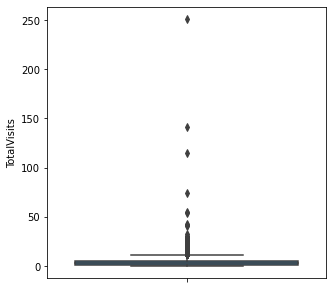

In [50]:
plt.figure(figsize = (5,5))
sns.boxplot(y=df_leads['TotalVisits'])
plt.show()

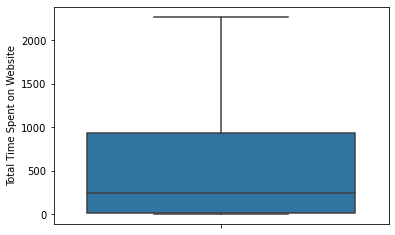

In [51]:
sns.boxplot(y=df_leads['Total Time Spent on Website'])
plt.show()

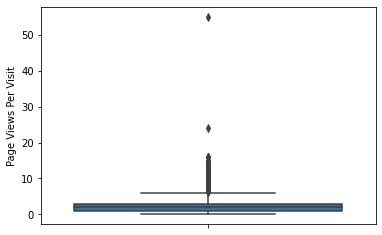

In [53]:
sns.boxplot(y=df_leads['Page Views Per Visit'])
plt.show()

In [54]:
#Total Visits have some outliers
#Remove top & bottom 1% of the Column Outlier values

Q3 = df_leads.TotalVisits.quantile(0.99)
df_leads = df_leads[(df_leads.TotalVisits <= Q3)]
Q1 = df_leads.TotalVisits.quantile(0.01)
df_leads = df_leads[(df_leads.TotalVisits >= Q1)]

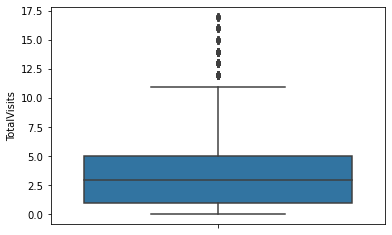

In [55]:
sns.boxplot(y=df_leads['TotalVisits'])
plt.show()

In [58]:
df_leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Test Train Split

In [57]:
from sklearn.model_selection import train_test_split

In [59]:
X = df_leads.drop(['Converted'], 1)
X.head()

C:\Users\VAMSIDHAR\AppData\Local\Temp\ipykernel_12628\2757164600.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_leads.drop(['Converted'], 1)


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2.0,1428,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# Considering target variable in y
y = df_leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [62]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [63]:
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
4418,0.235294,0.666223,0.2500,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3517,0.176471,0.149578,0.1875,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4639,0.117647,0.040391,0.1250,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1904,0.235294,0.022636,0.2500,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3044,0.235294,0.402130,0.2500,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Regression Model

In [68]:
# Importing functions from sklearn library
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.feature_selection import RFE
import statsmodels.api as sm

In [75]:
rfe = RFE(lr, step = 15)
rfe = rfe.fit(X_train, y_train)

C:\Users\VAMSIDHAR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Last Notable Activity_Email Bounced', False, 2),
 ('Last Notable Activity_Email Link Clicked', True, 1),
 ('Last Notable Activity_Email Marked Spam', False, 3),
 ('Last Notable Activity_Email Opened', True, 1),
 ('Last Notable Activity_Email Received', False, 3),
 ('Last Notable Activity_Form Submitted on Website', False, 4),
 ('Last Notable Activity_Had a Phone Conversation', True, 1),
 ('Last Notable Activity_Modified', True, 1),
 ('Last Notable Activity_Olark Chat Conversation', True, 1),
 ('Last Notable Activity_Page Visited on Website', True, 1),
 ('Last Notable Activity_Resubscribed to emails', True, 1),
 ('Last Notable Activity_SMS Sent', False, 3),
 ('Last Notable Activity_Unreachable', True, 1),
 ('Last Notable Activity_Unsubscribed', False, 3),
 ('Last Notable Activity_View in browser link Clicked', False, 4),
 ('A free copy of Mastering The Interview_Yes', False, 4),


In [77]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [78]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [79]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6379
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2754.4
Date:                Tue, 28 Mar 2023   Deviance:                       5508.9
Time:                        08:43:39   Pearson chi2:                 6.66e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3774
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.9106      0.420     -2.167      0.030      -1.734      -0.087
TotalVisits                                        1.7508      0.290      6.039      0.000       1.183       2.319
Total Time Spent on Website                        4.7145      0.163     28.980      0.000       4.396       5.033
Page Views Per Visit                              -1.9735      0.417     -4.734      0.000      -2.791      -1.157
Last Notable Activity_Email Link Clicked          -1.5323      0.294     -5.206      0.000      -2.109      -0.955
Last Notable Activity_Email Opened                -0.9967      0.170     -5.877      0.000      -1.329      -0.664
Last Notable Activity_Had a Phone Conversation     2.1039      1.119      1.881      0.060      -0.088       4.296
Last Notable Activity_Modified                    -1.4340      0.136    -10.518      0.000      -1.701      -1.167
Last Notable Activity_Olark Chat Conversation     -1.1792      0.378     -3.120      0.002      -1.920      -0.438
Last Notable Activity_Page Visited on Website     -1.4375      0.252     -5.695      0.000      -1.932      -0.943
Last Notable Activity_Resubscribed to emails      10.7966   1.46e+04      0.001      0.999   -2.86e+04    2.87e+04
Last Notable Activity_Unreachable                  0.8446      0.595      1.421      0.155      -0.321       2.010
Lead Source_Direct Traffic                        -0.4817      0.392     -1.228      0.220      -1.251       0.287
Lead Source_Google                                -0.1120      0.391     -0.287      0.774      -0.878       0.654
Lead Source_No Source                              1.6773      0.943      1.779      0.075      -0.171       3.526
Lead Source_Olark Chat                             0.8834      0.396      2.229      0.026       0.107       1.660
Lead Source_Organic Search                        -0.1520      0.400     -0.380      0.704      -0.935       0.632
Lead Source_Reference                              2.0067      0.886      2.265      0.024       0.270       3.744
Lead Source_Referral Sites                        -0.3004      0.495     -0.607      0.544      -1.271       0.670
Lead Source_Social Media                          23.3511   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Lead Source_Welingak Website                       4.2649      1.329      3.210      0.001       1.661       6.869
Lead Source_google                               -20.4106   1.86e+04     -0.001      0.999   -3.64e+04    3.64e+04
Lead Origin_Lead Add Form                          1.8359      0.844      2.175      0.030       0.182       3.490
Do Not Email_Yes                                  -1.4188      0.191     -7.413      0.000   

In [80]:
# Importing VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [81]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\VAMSIDHAR\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
28,Last Activity_Resubscribed to emails,inf
9,Last Notable Activity_Resubscribed to emails,inf
21,Lead Origin_Lead Add Form,56.60
16,Lead Source_Reference,43.20
19,Lead Source_Welingak Website,12.61
12,Lead Source_Google,8.91
11,Lead Source_Direct Traffic,7.96
4,Last Notable Activity_Email Opened,7.04
2,Page Views Per Visit,6.22
0,TotalVisits,5.57


In [82]:
X_train.drop('Last Activity_Resubscribed to emails', axis = 1, inplace = True)
X_train.drop('Last Notable Activity_Resubscribed to emails', axis = 1, inplace = True)

In [83]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6380
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2755.1
Date:                Tue, 28 Mar 2023   Deviance:                       5510.3
Time:                        08:51:37   Pearson chi2:                 6.66e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3773
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.8980      0.420     -2.137      0.033      -1.721      -0.075
TotalVisits                                        1.7503      0.290      6.037      0.000       1.182       2.319
Total Time Spent on Website                        4.7143      0.163     28.977      0.000       4.395       5.033
Page Views Per Visit                              -1.9744      0.417     -4.736      0.000      -2.791      -1.157
Last Notable Activity_Email Link Clicked          -1.5457      0.294     -5.258      0.000      -2.122      -0.970
Last Notable Activity_Email Opened                -1.0095      0.169     -5.969      0.000      -1.341      -0.678
Last Notable Activity_Had a Phone Conversation     2.0916      1.118      1.870      0.061      -0.101       4.284
Last Notable Activity_Modified                    -1.4428      0.136    -10.598      0.000      -1.710      -1.176
Last Notable Activity_Olark Chat Conversation     -1.1877      0.378     -3.143      0.002      -1.928      -0.447
Last Notable Activity_Page Visited on Website     -1.4498      0.252     -5.750      0.000      -1.944      -0.956
Last Notable Activity_Unreachable                  0.8322      0.594      1.400      0.162      -0.333       1.997
Lead Source_Direct Traffic                        -0.4818      0.392     -1.228      0.220      -1.251       0.287
Lead Source_Google                                -0.1120      0.391     -0.287      0.774      -0.878       0.654
Lead Source_No Source                              1.6785      0.943      1.780      0.075      -0.170       3.527
Lead Source_Olark Chat                             0.8863      0.396      2.236      0.025       0.109       1.663
Lead Source_Organic Search                        -0.1520      0.400     -0.380      0.704      -0.936       0.632
Lead Source_Reference                              2.0083      0.886      2.266      0.023       0.271       3.745
Lead Source_Referral Sites                        -0.3008      0.495     -0.607      0.544      -1.272       0.670
Lead Source_Social Media                          23.3530   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Lead Source_Welingak Website                       4.2672      1.329      3.211      0.001       1.663       6.872
Lead Source_google                               -20.4108   1.86e+04     -0.001      0.999   -3.64e+04    3.64e+04
Lead Origin_Lead Add Form                          1.8343      0.844      2.173      0.030       0.180       3.488
Do Not Email_Yes                                  -1.4217      0.191     -7.428      0.000      -1.797      -1.047
Last Activity_Converted to Lead                   -0.6102      0.220     -2.777      0.005   

In [84]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,Lead Origin_Lead Add Form,56.60
15,Lead Source_Reference,43.20
18,Lead Source_Welingak Website,12.61
11,Lead Source_Google,8.89
10,Lead Source_Direct Traffic,7.94
4,Last Notable Activity_Email Opened,7.02
2,Page Views Per Visit,6.22
0,TotalVisits,5.57
6,Last Notable Activity_Modified,5.48
27,Last Activity_SMS Sent,5.28


In [86]:
# Dropping Lead Source Google and Direct Traffic with high VIF and high P Value
X_train.drop('Lead Source_Google', axis = 1, inplace = True)

KeyError: "['Lead Source_Google'] not found in axis"

In [87]:
X_train.drop('Lead Source_Direct Traffic', axis = 1, inplace = True)

In [88]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6382
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2764.6
Date:                Tue, 28 Mar 2023   Deviance:                       5529.2
Time:                        08:58:46   Pearson chi2:                 6.63e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3754
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.1831      0.184     -6.424      0.000      -1.544      -0.822
TotalVisits                                        1.7678      0.290      6.102      0.000       1.200       2.336
Total Time Spent on Website                        4.7110      0.162     29.075      0.000       4.393       5.029
Page Views Per Visit                              -1.9392      0.417     -4.650      0.000      -2.757      -1.122
Last Notable Activity_Email Link Clicked          -1.5765      0.294     -5.370      0.000      -2.152      -1.001
Last Notable Activity_Email Opened                -1.0102      0.169     -5.972      0.000      -1.342      -0.679
Last Notable Activity_Had a Phone Conversation     2.1949      1.122      1.956      0.050      -0.004       4.394
Last Notable Activity_Modified                    -1.4185      0.136    -10.445      0.000      -1.685      -1.152
Last Notable Activity_Olark Chat Conversation     -1.1562      0.378     -3.060      0.002      -1.897      -0.416
Last Notable Activity_Page Visited on Website     -1.4634      0.252     -5.797      0.000      -1.958      -0.969
Last Notable Activity_Unreachable                  0.8482      0.592      1.433      0.152      -0.312       2.009
Lead Source_No Source                              1.8667      0.899      2.076      0.038       0.104       3.629
Lead Source_Olark Chat                             1.1687      0.122      9.610      0.000       0.930       1.407
Lead Source_Organic Search                         0.1229      0.104      1.180      0.238      -0.081       0.327
Lead Source_Reference                              2.1480      0.849      2.529      0.011       0.483       3.813
Lead Source_Referral Sites                        -0.0294      0.313     -0.094      0.925      -0.642       0.583
Lead Source_Social Media                          23.6088   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Lead Source_Welingak Website                       4.4142      1.305      3.384      0.001       1.857       6.971
Lead Source_google                               -20.1506   1.85e+04     -0.001      0.999   -3.62e+04    3.62e+04
Lead Origin_Lead Add Form                          1.9756      0.828      2.385      0.017       0.352       3.599
Do Not Email_Yes                                  -1.4585      0.191     -7.641      0.000      -1.833      -1.084
Last Activity_Converted to Lead                   -0.6640      0.219     -3.026      0.002      -1.094      -0.234
Last Activity_Email Bounced                       -0.5231      0.343     -1.527      0.127      -1.195       0.148
Last Activity_Email Received                      21.1265   2.06e+04      0.001      0.999   

In [89]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,Lead Origin_Lead Add Form,56.57
13,Lead Source_Reference,42.63
16,Lead Source_Welingak Website,12.45
2,Page Views Per Visit,5.90
0,TotalVisits,5.48
10,Lead Source_No Source,3.48
6,Last Notable Activity_Modified,2.90
4,Last Notable Activity_Email Opened,2.42
1,Total Time Spent on Website,2.18
25,Last Activity_SMS Sent,2.14


In [90]:
# Removing attributes that have high P Value more than 0.9
X_train.drop(['Lead Source_Social Media','Last Activity_Email Received','Lead Source_Referral Sites'], axis = 1, inplace = True)

In [91]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6385
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2767.8
Date:                Tue, 28 Mar 2023   Deviance:                       5535.5
Time:                        09:04:34   Pearson chi2:                 6.63e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3748
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.1694      0.184     -6.371      0.000      -1.529      -0.810
TotalVisits                                        1.7658      0.289      6.104      0.000       1.199       2.333
Total Time Spent on Website                        4.7159      0.162     29.112      0.000       4.398       5.033
Page Views Per Visit                              -1.9468      0.417     -4.669      0.000      -2.764      -1.130
Last Notable Activity_Email Link Clicked          -1.5878      0.293     -5.413      0.000      -2.163      -1.013
Last Notable Activity_Email Opened                -1.0224      0.169     -6.062      0.000      -1.353      -0.692
Last Notable Activity_Had a Phone Conversation     2.1830      1.122      1.946      0.052      -0.016       4.382
Last Notable Activity_Modified                    -1.4247      0.136    -10.506      0.000      -1.691      -1.159
Last Notable Activity_Olark Chat Conversation     -1.1910      0.377     -3.161      0.002      -1.930      -0.452
Last Notable Activity_Page Visited on Website     -1.4766      0.252     -5.856      0.000      -1.971      -0.982
Last Notable Activity_Unreachable                  0.8344      0.592      1.410      0.159      -0.326       1.995
Lead Source_No Source                              1.8663      0.899      2.075      0.038       0.104       3.629
Lead Source_Olark Chat                             1.1626      0.121      9.573      0.000       0.925       1.401
Lead Source_Organic Search                         0.1210      0.104      1.163      0.245      -0.083       0.325
Lead Source_Reference                              2.1467      0.849      2.528      0.011       0.482       3.811
Lead Source_Welingak Website                       4.4141      1.304      3.384      0.001       1.857       6.971
Lead Source_google                               -20.1538   1.85e+04     -0.001      0.999   -3.62e+04    3.61e+04
Lead Origin_Lead Add Form                          1.9740      0.828      2.384      0.017       0.351       3.597
Do Not Email_Yes                                  -1.4619      0.191     -7.658      0.000      -1.836      -1.088
Last Activity_Converted to Lead                   -0.6722      0.219     -3.065      0.002      -1.102      -0.242
Last Activity_Email Bounced                       -0.5290      0.343     -1.544      0.123      -1.201       0.142
Last Activity_Form Submitted on Website           -0.5297      0.324     -1.636      0.102      -1.164       0.105
Last Activity_Olark Chat Conversation             -1.3525      0.203     -6.648      0.000      -1.751      -0.954
Last Activity_SMS Sent                             0.4807      0.148      3.243      0.001   

In [92]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,Lead Origin_Lead Add Form,56.57
13,Lead Source_Reference,42.63
14,Lead Source_Welingak Website,12.45
2,Page Views Per Visit,5.90
0,TotalVisits,5.47
10,Lead Source_No Source,3.48
6,Last Notable Activity_Modified,2.90
4,Last Notable Activity_Email Opened,2.42
1,Total Time Spent on Website,2.17
22,Last Activity_SMS Sent,2.14


In [93]:
X_train.drop(['Lead Origin_Lead Add Form'], axis = 1, inplace = True)

In [94]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6386
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2770.6
Date:                Tue, 28 Mar 2023   Deviance:                       5541.2
Time:                        09:06:15   Pearson chi2:                 6.62e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3743
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.1504      0.183     -6.279      0.000      -1.509      -0.791
TotalVisits                                        1.7546      0.289      6.069      0.000       1.188       2.321
Total Time Spent on Website                        4.7050      0.162     29.077      0.000       4.388       5.022
Page Views Per Visit                              -1.9749      0.417     -4.739      0.000      -2.792      -1.158
Last Notable Activity_Email Link Clicked          -1.5954      0.293     -5.443      0.000      -2.170      -1.021
Last Notable Activity_Email Opened                -1.0279      0.168     -6.102      0.000      -1.358      -0.698
Last Notable Activity_Had a Phone Conversation     2.1758      1.122      1.939      0.052      -0.023       4.375
Last Notable Activity_Modified                    -1.4277      0.135    -10.540      0.000      -1.693      -1.162
Last Notable Activity_Olark Chat Conversation     -1.1925      0.377     -3.167      0.002      -1.930      -0.454
Last Notable Activity_Page Visited on Website     -1.4824      0.252     -5.885      0.000      -1.976      -0.989
Last Notable Activity_Unreachable                  0.8269      0.592      1.398      0.162      -0.333       1.987
Lead Source_No Source                              3.5594      0.596      5.973      0.000       2.391       4.727
Lead Source_Olark Chat                             1.1531      0.121      9.513      0.000       0.916       1.391
Lead Source_Organic Search                         0.1210      0.104      1.164      0.244      -0.083       0.325
Lead Source_Reference                              4.1073      0.215     19.081      0.000       3.685       4.529
Lead Source_Welingak Website                       6.3741      1.014      6.289      0.000       4.388       8.361
Lead Source_google                               -20.1540   1.85e+04     -0.001      0.999   -3.62e+04    3.62e+04
Do Not Email_Yes                                  -1.4561      0.190     -7.649      0.000      -1.829      -1.083
Last Activity_Converted to Lead                   -0.6799      0.219     -3.101      0.002      -1.109      -0.250
Last Activity_Email Bounced                       -0.5413      0.343     -1.579      0.114      -1.213       0.131
Last Activity_Form Submitted on Website           -0.5336      0.324     -1.649      0.099      -1.168       0.101
Last Activity_Olark Chat Conversation             -1.3576      0.203     -6.677      0.000      -1.756      -0.959
Last Activity_SMS Sent                             0.4769      0.148      3.222      0.001       0.187       0.767
=============================================================================================

In [95]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,5.90
0,TotalVisits,5.47
6,Last Notable Activity_Modified,2.90
4,Last Notable Activity_Email Opened,2.42
1,Total Time Spent on Website,2.17
21,Last Activity_SMS Sent,2.13
11,Lead Source_Olark Chat,2.10
20,Last Activity_Olark Chat Conversation,2.09
16,Do Not Email_Yes,1.89
18,Last Activity_Email Bounced,1.89


In [96]:
X_train.drop('Lead Source_Organic Search', axis = 1, inplace = True)

In [97]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6387
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2771.3
Date:                Tue, 28 Mar 2023   Deviance:                       5542.5
Time:                        09:11:19   Pearson chi2:                 6.63e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3741
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.1495      0.183     -6.275      0.000      -1.509      -0.790
TotalVisits                                        1.7939      0.287      6.246      0.000       1.231       2.357
Total Time Spent on Website                        4.7003      0.162     29.059      0.000       4.383       5.017
Page Views Per Visit                              -1.9145      0.413     -4.636      0.000      -2.724      -1.105
Last Notable Activity_Email Link Clicked          -1.5996      0.293     -5.454      0.000      -2.174      -1.025
Last Notable Activity_Email Opened                -1.0303      0.168     -6.117      0.000      -1.360      -0.700
Last Notable Activity_Had a Phone Conversation     2.1485      1.121      1.916      0.055      -0.049       4.346
Last Notable Activity_Modified                    -1.4292      0.135    -10.553      0.000      -1.695      -1.164
Last Notable Activity_Olark Chat Conversation     -1.1993      0.376     -3.186      0.001      -1.937      -0.462
Last Notable Activity_Page Visited on Website     -1.4898      0.252     -5.918      0.000      -1.983      -0.996
Last Notable Activity_Unreachable                  0.8112      0.590      1.374      0.170      -0.346       1.969
Lead Source_No Source                              3.5553      0.595      5.971      0.000       2.388       4.722
Lead Source_Olark Chat                             1.1515      0.121      9.500      0.000       0.914       1.389
Lead Source_Reference                              4.1058      0.215     19.074      0.000       3.684       4.528
Lead Source_Welingak Website                       6.3733      1.014      6.288      0.000       4.387       8.360
Lead Source_google                               -20.1813   1.85e+04     -0.001      0.999   -3.62e+04    3.62e+04
Do Not Email_Yes                                  -1.4549      0.190     -7.646      0.000      -1.828      -1.082
Last Activity_Converted to Lead                   -0.6676      0.219     -3.048      0.002      -1.097      -0.238
Last Activity_Email Bounced                       -0.5334      0.343     -1.555      0.120      -1.206       0.139
Last Activity_Form Submitted on Website           -0.5411      0.323     -1.674      0.094      -1.175       0.092
Last Activity_Olark Chat Conversation             -1.3526      0.203     -6.660      0.000      -1.751      -0.955
Last Activity_SMS Sent                             0.4779      0.148      3.229      0.001       0.188       0.768
==================================================================================================================
"""

In [98]:
X_train.drop('Lead Source_google', axis = 1, inplace = True)

In [99]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6388
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2771.8
Date:                Tue, 28 Mar 2023   Deviance:                       5543.5
Time:                        09:12:40   Pearson chi2:                 6.63e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3740
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.1506      0.183     -6.282      0.000      -1.510      -0.792
TotalVisits                                        1.7959      0.287      6.253      0.000       1.233       2.359
Total Time Spent on Website                        4.6998      0.162     29.056      0.000       4.383       5.017
Page Views Per Visit                              -1.9207      0.413     -4.651      0.000      -2.730      -1.111
Last Notable Activity_Email Link Clicked          -1.5980      0.293     -5.449      0.000      -2.173      -1.023
Last Notable Activity_Email Opened                -1.0284      0.168     -6.108      0.000      -1.358      -0.698
Last Notable Activity_Had a Phone Conversation     2.1506      1.121      1.918      0.055      -0.047       4.348
Last Notable Activity_Modified                    -1.4303      0.135    -10.564      0.000      -1.696      -1.165
Last Notable Activity_Olark Chat Conversation     -1.2005      0.376     -3.189      0.001      -1.938      -0.463
Last Notable Activity_Page Visited on Website     -1.4882      0.252     -5.913      0.000      -1.981      -0.995
Last Notable Activity_Unreachable                  0.8132      0.590      1.377      0.168      -0.344       1.970
Lead Source_No Source                              3.5552      0.595      5.970      0.000       2.388       4.722
Lead Source_Olark Chat                             1.1512      0.121      9.497      0.000       0.914       1.389
Lead Source_Reference                              4.1062      0.215     19.075      0.000       3.684       4.528
Lead Source_Welingak Website                       6.3734      1.013      6.289      0.000       4.387       8.360
Do Not Email_Yes                                  -1.4558      0.190     -7.655      0.000      -1.828      -1.083
Last Activity_Converted to Lead                   -0.6647      0.219     -3.035      0.002      -1.094      -0.235
Last Activity_Email Bounced                       -0.5301      0.343     -1.546      0.122      -1.202       0.142
Last Activity_Form Submitted on Website           -0.5382      0.323     -1.665      0.096      -1.172       0.095
Last Activity_Olark Chat Conversation             -1.3499      0.203     -6.647      0.000      -1.748      -0.952
Last Activity_SMS Sent                             0.4800      0.148      3.244      0.001       0.190       0.770
==================================================================================================================
"""

In [100]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,5.80
0,TotalVisits,5.39
6,Last Notable Activity_Modified,2.89
4,Last Notable Activity_Email Opened,2.42
1,Total Time Spent on Website,2.17
19,Last Activity_SMS Sent,2.13
11,Lead Source_Olark Chat,2.10
18,Last Activity_Olark Chat Conversation,2.09
14,Do Not Email_Yes,1.89
16,Last Activity_Email Bounced,1.88


In [101]:
# Removing Page view per visit as VIF >5
X_train.drop('Page Views Per Visit', axis = 1, inplace = True)

In [102]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6389
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2782.7
Date:                Tue, 28 Mar 2023   Deviance:                       5565.5
Time:                        09:14:49   Pearson chi2:                 6.62e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3719
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.3438      0.178     -7.536      0.000      -1.693      -0.994
TotalVisits                                        1.0359      0.235      4.402      0.000       0.575       1.497
Total Time Spent on Website                        4.6901      0.161     29.042      0.000       4.374       5.007
Last Notable Activity_Email Link Clicked          -1.5576      0.291     -5.344      0.000      -2.129      -0.986
Last Notable Activity_Email Opened                -1.0151      0.168     -6.040      0.000      -1.345      -0.686
Last Notable Activity_Had a Phone Conversation     2.1241      1.115      1.906      0.057      -0.061       4.309
Last Notable Activity_Modified                    -1.4295      0.135    -10.577      0.000      -1.694      -1.165
Last Notable Activity_Olark Chat Conversation     -1.1588      0.374     -3.098      0.002      -1.892      -0.426
Last Notable Activity_Page Visited on Website     -1.3187      0.246     -5.350      0.000      -1.802      -0.836
Last Notable Activity_Unreachable                  0.8214      0.592      1.387      0.165      -0.339       1.982
Lead Source_No Source                              3.7419      0.592      6.324      0.000       2.582       4.902
Lead Source_Olark Chat                             1.3282      0.116     11.495      0.000       1.102       1.555
Lead Source_Reference                              4.2803      0.212     20.144      0.000       3.864       4.697
Lead Source_Welingak Website                       6.5576      1.013      6.474      0.000       4.572       8.543
Do Not Email_Yes                                  -1.4935      0.189     -7.885      0.000      -1.865      -1.122
Last Activity_Converted to Lead                   -0.5961      0.218     -2.729      0.006      -1.024      -0.168
Last Activity_Email Bounced                       -0.4548      0.342     -1.329      0.184      -1.125       0.216
Last Activity_Form Submitted on Website           -0.4869      0.322     -1.511      0.131      -1.118       0.145
Last Activity_Olark Chat Conversation             -1.3201      0.203     -6.515      0.000      -1.717      -0.923
Last Activity_SMS Sent                             0.4707      0.148      3.188      0.001       0.181       0.760
==================================================================================================================
"""

In [103]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,3.18
5,Last Notable Activity_Modified,2.70
3,Last Notable Activity_Email Opened,2.17
1,Total Time Spent on Website,2.16
17,Last Activity_Olark Chat Conversation,2.09
10,Lead Source_Olark Chat,1.97
18,Last Activity_SMS Sent,1.93
15,Last Activity_Email Bounced,1.88
13,Do Not Email_Yes,1.87
6,Last Notable Activity_Olark Chat Conversation,1.40


In [ ]:
# Removing Last Activity_Email Bounced as P Value is slightly higher

In [104]:
X_train.drop('Last Activity_Email Bounced', axis = 1, inplace = True)

In [105]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6390
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2783.7
Date:                Tue, 28 Mar 2023   Deviance:                       5567.3
Time:                        09:18:09   Pearson chi2:                 6.61e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3717
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.3827      0.176     -7.850      0.000      -1.728      -1.037
TotalVisits                                        1.0526      0.235      4.476      0.000       0.592       1.514
Total Time Spent on Website                        4.6901      0.161     29.042      0.000       4.374       5.007
Last Notable Activity_Email Link Clicked          -1.5238      0.290     -5.246      0.000      -2.093      -0.955
Last Notable Activity_Email Opened                -0.9808      0.166     -5.904      0.000      -1.306      -0.655
Last Notable Activity_Had a Phone Conversation     2.1575      1.114      1.936      0.053      -0.027       4.342
Last Notable Activity_Modified                    -1.4212      0.135    -10.556      0.000      -1.685      -1.157
Last Notable Activity_Olark Chat Conversation     -1.1497      0.374     -3.074      0.002      -1.883      -0.417
Last Notable Activity_Page Visited on Website     -1.2819      0.245     -5.227      0.000      -1.763      -0.801
Last Notable Activity_Unreachable                  0.8553      0.592      1.446      0.148      -0.304       2.015
Lead Source_No Source                              3.7564      0.588      6.387      0.000       2.604       4.909
Lead Source_Olark Chat                             1.3318      0.116     11.524      0.000       1.105       1.558
Lead Source_Reference                              4.2914      0.213     20.194      0.000       3.875       4.708
Lead Source_Welingak Website                       6.5676      1.013      6.483      0.000       4.582       8.553
Do Not Email_Yes                                  -1.6152      0.169     -9.581      0.000      -1.946      -1.285
Last Activity_Converted to Lead                   -0.5676      0.218     -2.608      0.009      -0.994      -0.141
Last Activity_Form Submitted on Website           -0.4592      0.322     -1.427      0.154      -1.090       0.172
Last Activity_Olark Chat Conversation             -1.2926      0.202     -6.405      0.000      -1.688      -0.897
Last Activity_SMS Sent                             0.5115      0.145      3.535      0.000       0.228       0.795
==================================================================================================================
"""

In [106]:
X_train.drop(['Last Notable Activity_Unreachable','Last Activity_Form Submitted on Website'], axis = 1, inplace = True)

In [107]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6392
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2785.9
Date:                Tue, 28 Mar 2023   Deviance:                       5571.9
Time:                        09:20:12   Pearson chi2:                 6.61e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3713
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.3509      0.169     -8.003      0.000      -1.682      -1.020
TotalVisits                                        1.0590      0.235      4.505      0.000       0.598       1.520
Total Time Spent on Website                        4.6814      0.161     29.033      0.000       4.365       4.997
Last Notable Activity_Email Link Clicked          -1.5552      0.286     -5.432      0.000      -2.116      -0.994
Last Notable Activity_Email Opened                -1.0117      0.159     -6.380      0.000      -1.322      -0.701
Last Notable Activity_Had a Phone Conversation     2.1247      1.113      1.909      0.056      -0.057       4.306
Last Notable Activity_Modified                    -1.4714      0.131    -11.210      0.000      -1.729      -1.214
Last Notable Activity_Olark Chat Conversation     -1.1996      0.373     -3.218      0.001      -1.930      -0.469
Last Notable Activity_Page Visited on Website     -1.3133      0.240     -5.467      0.000      -1.784      -0.843
Lead Source_No Source                              3.7552      0.588      6.382      0.000       2.602       4.908
Lead Source_Olark Chat                             1.3307      0.115     11.522      0.000       1.104       1.557
Lead Source_Reference                              4.2960      0.212     20.219      0.000       3.880       4.712
Lead Source_Welingak Website                       6.5775      1.013      6.491      0.000       4.592       8.563
Do Not Email_Yes                                  -1.6199      0.168     -9.658      0.000      -1.949      -1.291
Last Activity_Converted to Lead                   -0.5469      0.216     -2.537      0.011      -0.969      -0.124
Last Activity_Olark Chat Conversation             -1.2729      0.200     -6.366      0.000      -1.665      -0.881
Last Activity_SMS Sent                             0.4908      0.138      3.553      0.000       0.220       0.762
==================================================================================================================
"""

In [108]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,3.15
5,Last Notable Activity_Modified,2.51
1,Total Time Spent on Website,2.15
3,Last Notable Activity_Email Opened,2.15
14,Last Activity_Olark Chat Conversation,2.01
9,Lead Source_Olark Chat,1.95
15,Last Activity_SMS Sent,1.87
6,Last Notable Activity_Olark Chat Conversation,1.39
13,Last Activity_Converted to Lead,1.24
7,Last Notable Activity_Page Visited on Website,1.23


## Model Evaluation

In [109]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

4418    0.924700
3517    0.110697
4639    0.114167
1904    0.118429
3044    0.781028
3296    0.910078
5332    0.046615
7070    0.600945
5307    0.856636
2098    0.262723
dtype: float64

In [110]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.9247    , 0.11069697, 0.11416716, 0.11842916, 0.78102834,
       0.91007767, 0.04661518, 0.60094477, 0.85663588, 0.26272296])

In [111]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.924700
1,0,0.110697
2,0,0.114167
3,0,0.118429
4,1,0.781028


In [112]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.924700,1
1,0,0.110697,0
2,0,0.114167,0
3,0,0.118429,0
4,1,0.781028,1


In [114]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [115]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3437,  501],
       [ 751, 1720]], dtype=int64)

In [116]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8046497113434233

In [117]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [118]:
# Calculating the sensitivity
TP/(TP+FN)

0.6960744637798462

In [119]:
# Calculating the specificity
TN/(TN+FP)

0.8727780599288979

In [ ]:
# With cutoff as 0.5, model accuracy is 80.46% with sensitivity of 69.6% and specificity of 87.28%

## Optimize ROC curve

In [120]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [121]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )


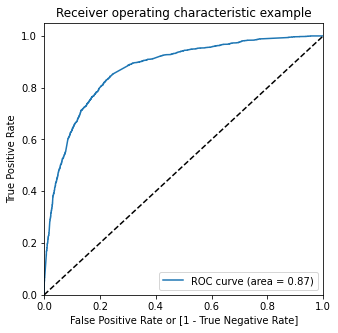

In [122]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [ ]:
# The area under ROC curve is 0.87 which is good

In [123]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.924700,1,1,1,1,1,1,1,1,1,1,1
1,0,0.110697,0,1,1,0,0,0,0,0,0,0,0
2,0,0.114167,0,1,1,0,0,0,0,0,0,0,0
3,0,0.118429,0,1,1,0,0,0,0,0,0,0,0
4,1,0.781028,1,1,1,1,1,1,1,1,1,0,0


In [124]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.385552,1.000000,0.000000
0.1,0.1,0.573880,0.972885,0.323514
0.2,0.2,0.741613,0.905706,0.638649
0.3,0.3,0.795444,0.833671,0.771458
0.4,0.4,0.801373,0.768515,0.821991
0.5,0.5,0.804650,0.696074,0.872778
0.6,0.6,0.795444,0.612707,0.910107
0.7,0.7,0.767670,0.481991,0.946927
0.8,0.8,0.743954,0.389721,0.966227
0.9,0.9,0.685598,0.205180,0.987049


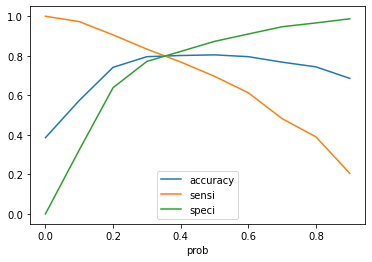

In [125]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
# Accuracy, specificty and sensitivity are same for cutoff of 0.35
# Considering optimal cutoff as 0.35

In [126]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.924700,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.110697,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.114167,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.118429,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.781028,1,1,1,1,1,1,1,1,1,0,0,1


In [127]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7995007021376189

In [128]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3127,  811],
       [ 474, 1997]], dtype=int64)

In [129]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [130]:
# Calculating the sensitivity
TP/(TP+FN)

0.8081748280048563

In [131]:
# Calculating the specificity
TN/(TN+FP)

0.7940578974098527

In [ ]:
# With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%

## Test Set

In [132]:
#Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [133]:
col = X_train.columns

In [134]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Lead Source_No Source,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent
5499,1.0,0.529412,0.573014,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6285,1.0,0.176471,0.040834,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3474,1.0,0.000000,0.000000,0,0,0,1,0,0,0,1,0,0,0,0,1,0
6370,1.0,0.000000,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2545,1.0,0.176471,0.586329,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4866,1.0,0.176471,0.144252,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5222,1.0,0.117647,0.118953,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3939,1.0,0.176471,0.001775,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3662,1.0,0.588235,0.389259,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [135]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.567680
1,0,0.023726
2,0,0.059271
3,1,0.615534
4,0,0.638575


In [136]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,1,0.567680,1
1,0,0.023726,0
2,0,0.059271,0
3,1,0.615534,1
4,0,0.638575,1
...,...,...,...
2743,0,0.182373,0
2744,0,0.156952,0
2745,0,0.102722,0
2746,0,0.445478,1


In [137]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7903930131004366

In [138]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1326,  368],
       [ 208,  846]], dtype=int64)

In [139]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [140]:
# Calculating the sensitivity
TP/(TP+FN)

0.8026565464895635

In [141]:
# Calculating the specificity
TN/(TN+FP)

0.7827626918536009

In [ ]:
# With 0.35 as cutoff accuracy, specificity and sensitivity of the model is around 79%

## Prcesion and Recall

In [142]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3437,  501],
       [ 751, 1720]], dtype=int64)

In [143]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7744259342638451

In [144]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6960744637798462

In [145]:
from sklearn.metrics import precision_recall_curve

In [146]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6404    1
 6405    0
 6406    1
 6407    0
 6408    0
 Name: Converted, Length: 6409, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       1
        ..
 6404    1
 6405    0
 6406    1
 6407    0
 6408    0
 Name: Predicted, Length: 6409, dtype: int64)

In [147]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

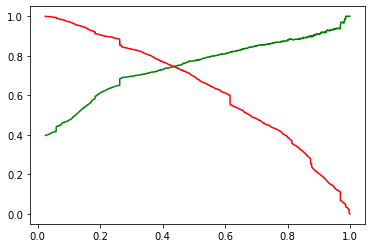

In [148]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [149]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.924700,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.110697,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.114167,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.118429,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.781028,1,1,1,1,1,1,1,1,1,0,0,1


In [150]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8029333749414885

In [151]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3279,  659],
       [ 604, 1867]], dtype=int64)

In [152]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [153]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7391132224861441

In [154]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7555645487656819

## Check the overall accuracy with Cutoff as 0.42

In [155]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.567680
1,0,0.023726
2,0,0.059271
3,1,0.615534
4,0,0.638575


In [156]:
# Making prediction using cut off 0.42
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,1,0.567680,1
1,0,0.023726,0
2,0,0.059271,0
3,1,0.615534,1
4,0,0.638575,1
...,...,...,...
2743,0,0.182373,0
2744,0,0.156952,0
2745,0,0.102722,0
2746,0,0.445478,1


In [157]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7889374090247453

In [158]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1383,  311],
       [ 269,  785]], dtype=int64)

In [159]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [160]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7162408759124088

In [161]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7447817836812144

In [163]:
# Calculating the specificity
TN/(TN+FP)

0.8164108618654073

In [ ]:
# With the curoff of 0.41, Accuracy is 79% Precision is 71.62% and Recall or Sensitivity is 74.48% and specificy is 81.64%